## BARC Lakehouse Cookbook - Hands-On Tutorial
 
#### A stepwise introduction to modern data lakehouse technologies for business users.

*written by Thomas Zeutschler, Analyst at [BARC](https://barc.com), Würzburg, Germany*
 
*sponsored by [Dremio](https://www.dremio.com), Santa Clara, California, USA, provider of a very modern Data Lakehouse platform*

### Table of contents

1. [Working with CSV files](01_working_with_csv_files.ipynb)
2. [Working with Parquet files](02_from_csv_to_parquet_files.ipynb)
3. [Working with Delta Lake files](03_lightning_fast_sql_analysis.ipynb)
4. [Working with Dremio](04_data_lakehouse_magic.ipynb)

-------------------------------------

## Step 3 - Very fast SQL analysis with DuckDB
Now that we know how to create and analyze Parquet files, it’s time to take it up a notch and run powerful SQL queries against your data using (DuckDB)[https://duckdb.org]. DuckDB is a modern, open-source (and free) in-process, in-memory analytical database. In-process means it’s not a server but an engine you can embed directly into your Python code. This serverless approach is a key concept in modern data processing, making DuckDB popular for data transformation and various analysis tasks.

DuckDB is also a prime example of how open-source software drives innovation and can outperform commercial software. It often puts traditional databases to shame—perhaps even the ones your company uses, which your IT department claims are the best and fastest. Just kidding… or am I? Even modern cloud data warehouses like Databricks, Snowflake, BigQuery, and Redshift, when used in isolation, often can’t match DuckDB’s speed for many data processing tasks. And the best part? DuckDB is free.

Beyond the Python use case shown below, DuckDB can also be used for analyzing data on your PC with tools like Excel, Power BI, Tableau, and other client-side data tools. All you need is to (install the DuckDB ODBC driver)[https://duckdb.org/docs/api/odbc/windows ]; your IT department can assist with this if needed.

### Step 3.1 - Limitations of DuckDB
While DuckDB is incredibly fast, it does have limitations. It isn’t a server, so it’s not suited for large-scale data warehousing or BI applications that need to serve many users or require clusters of servers to handle parallel processing. Additionally, as DuckDB is a bare SQL engine, it lacks the productivity, agility, and user-friendly features that business users expect today. DuckDB also does not (yet) provide comprehensive governance, security, or authorization features that enterprises and IT departments require. So, you shouldn’t look to replace your company’s data warehouse with DuckDB.

However, in the next and final step of this guide, we’ll explore technology that includes all the capabilities DuckDB lacks, while being even faster and capable of serving your company’s data warehousing and BI needs.

### Step 3.2 - Don't be afraid of SQL
Learning the basics of SQL is as simple as filling out a Visitor Access Form at a large company. It may take a few minutes to get accustomed to, but before long, you’re in. **SQL is still the most important language for data analysis and data science.** It’s used across almost all data tools and platforms. If you know some SQL, you can work with nearly any data technology. For most business users, SQL is the only language they need to know. You can learn the basics in just a few hours; start here: [W3Schools SQL Tutorial](https://www.w3schools.com/sql/).     

### Step 3.3 - Using SQL with DuckDB in Python
DuckDB is my current #1 choice and recommendation for personal data exploration, transformation, and analysis. Its standout feature is the ability to run SQL queries directly on Parquet (and CSV) files. No database setup, no imports, no server—just instant SQL analysis with a single line of code.

Let’s dive into the hands-on part. The business question remains the same: **How many black BMWs were sold in 2015?**. This time, we’ll use DuckDB to answer it. As you’ll see, one line of code is all it takes.

When you run the code, you’ll see that DuckDB is indeed very fast. Compare the execution time with the previous steps: it’s almost 50x times faster than using the CSV file with Pandas and 10x times faster than using the Parquet file with Pandas. And keep in mind, you just processed and analyzed half a million records in a fraction of a second without any setup, preparation or configuration.

In [5]:
import duckdb 

result = duckdb.sql("SELECT count(*) FROM 'car_sales.parquet' WHERE make='BMW' AND color='black' AND year=2015")
print(result) 


┌──────────────┐
│ count_star() │
│    int64     │
├──────────────┤
│          168 │
└──────────────┘



### Step 3.5 - Try this in Excel 

If you are not convinced of the capabilities of modern data tools yet, you can try the same analysis in Excel. Open the CSV file in Excel and filter and aggregate the data to get the answer to our business question of **How many black BMWs were sold in 2015?**. Stop the time!
If you are faster with Excel than using Python and DuckDB, then I get you a beer or even two. If not, you owe me a beer. **Deal?** No deal? Ok, I have a free one for you anyway... 

### Step 3.6 - Showtime!* Analysis, Excel-Export, and Visualization 
\**Quote from the Mangalorean boss in the movie 'The fifth element' from 1997.*

This last example is just a showcase. No need to understand everything or anything.  
But it should give you an idea of what you can do with DuckDB, SQL, and a few lines of Python code.

As a German, I'm interested in the sales, quantity, and market share of the German car manufacturers—BMW, Audi, Mercedes, and VW—in the US for black and white cars.

You can play around with different filters, aggregations, and even the SQL query itself. This way, you'll get accustomed to the capabilities of modern data tools. Your imagination is the limit.

┌───────────────┬─────────┬─────────┬─────────────┬───────────┬──────────────────────┐
│     make      │  color  │ quanity │    sales    │ avg_price │ market_share_percent │
│    varchar    │ varchar │  int64  │   double    │  double   │        double        │
├───────────────┼─────────┼─────────┼─────────────┼───────────┼──────────────────────┤
│ Audi          │ black   │    1805 │  38272925.0 │   21204.0 │                  0.5 │
│ Audi          │ white   │    1049 │  25423125.0 │   24236.0 │                 0.33 │
│ BMW           │ black   │    6428 │ 143853478.0 │   22379.0 │                 1.89 │
│ BMW           │ white   │    3900 │  98408718.0 │   25233.0 │                 1.29 │
│ Mercedes-Benz │ black   │    5728 │ 129630565.0 │   22631.0 │                  1.7 │
│ Mercedes-Benz │ white   │    3095 │  71680857.0 │   23160.0 │                 0.94 │
│ Volkswagen    │ black   │    2493 │  23641423.0 │    9483.0 │                 0.31 │
│ Volkswagen    │ white   │    1847 │  1945

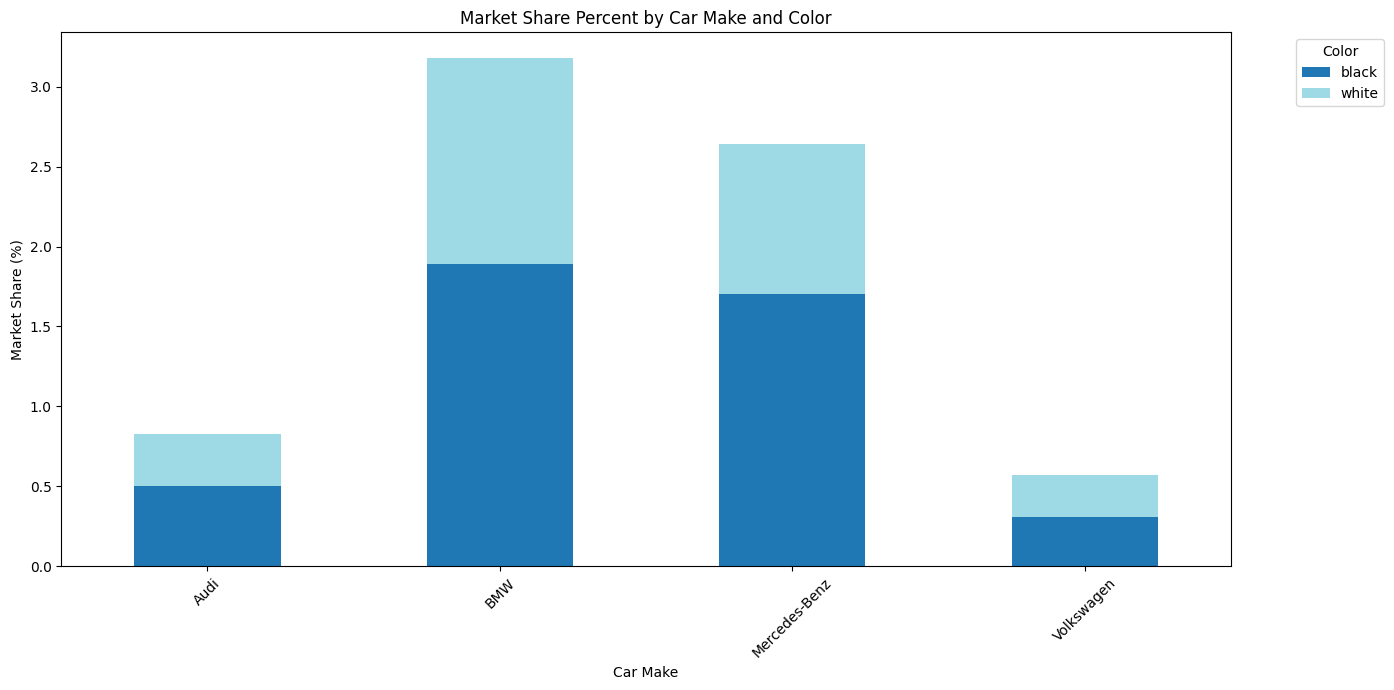

In [6]:
# We make our query a bit more complex but much more flexible.
# 1. Configurations, so we can easily change the query parameters or even the query.
import duckdb
car_makers = ['BMW', 'Audi', 'Mercedes-Benz', 'Volkswagen']   # maybe use ['Chevrolet', 'Ford', 'Buick', 'Cadillac'] for US cars.
colors = ['black', 'white']   # maybe use ['red', 'blue', 'green', 'yellow'] other colors.
file_name = 'car_sales.parquet' # exchange with 'car_sales.csv' if you want to use the CSV file directly.
sql =f"""   
    SELECT 
        make, 
        color, 
        COUNT(vin) AS quanity, 
        SUM(sellingprice) AS sales, 
        ROUND(AVG(sellingprice),0) AS avg_price,
        ROUND((SUM(sellingprice) * 100.0 / (SELECT SUM(sellingprice) FROM '{file_name}')), 2) AS market_share_percent
    FROM '{file_name}'
    WHERE make  IN ({','.join([f"'{make}'" for make in car_makers])}) AND
          color IN ({','.join([f"'{color}'" for color in colors])})           
    GROUP BY make, color
    ORDER BY make ASC, color ASC  -- This is a comment in SQL! use ASC for ascending and DESC for descending order.
"""

# 2. Execution of the query, printing the result and exporting it to Excel.
print(duckdb.sql(sql))  # Just execute the query and print the result, that's it.

# And now, we want to export the result to Excel, maybe a bit special and tricky to understand, 
# but hey, it's just one line of code and think of the opportunities you have with this.
duckdb.sql("INSTALL spatial;LOAD spatial;")  # we need to install and load the DuckDB spatial extension, to export to Excel.
# Now we execute and export to Excel in just shoot. Cool!
duckdb.sql(f"COPY ({sql}) TO 'market_analysis.xlsx' WITH (FORMAT GDAL, DRIVER 'xlsx');")
# Look on your hard drive, you will find the Excel file with the result in the same folder as this file.

# 3. Finally, the cherry on the cake, a nice chart to visualize the result.
# The following lines of code were written by ChatGPT, not me. So you can do it too, 
# just describe and ask for the chart you want, give ChatGPT all the lines above in addition, and here's what you get.
import pandas as pd
import matplotlib.pyplot as plt
# Execute the SQL query and store the result in a Pandas DataFrame
df = duckdb.query(sql).to_df()
# Pivot the DataFrame to create a matrix suitable for stacked bar plotting
df_pivot = df.pivot(index='make', columns='color', values='market_share_percent').fillna(0)
# Plot the stacked bar chart
df_pivot.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
# Add labels and title
plt.xlabel('Car Make')
plt.ylabel('Market Share (%)')
plt.title('Market Share Percent by Car Make and Color')
plt.xticks(rotation=45)
plt.legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# Show the plot
plt.show()

### 3.7 Final thoughts and takeaways   

Tools like DuckDB - and many other impressive tools such as [Polars](https://pola.rs) and [Dask](https://www.dask.org), which are modern, high-performance alternatives to Pandas—already demonstrate what is possible with today’s data technologies. You can process and analyze large volumes of data in seconds, without any complicated setup or configuration. You can run complex SQL queries on your data with a single line of code. Exporting results to Excel takes just another line of code. Creating beautiful visualizations requires only a few more. And all of this can be done right on your PC, without relying on a server, cloud, or IT support.

However, when it comes to large-scale enterprise data processing, data warehousing, and BI, more than just a fast SQL engine is needed. You need a comprehensive data platform that includes all the features and capabilities an enterprise demands, capable of scaling from handling just a few files up to petabytes of data and supporting thousands of concurrent users.

*Please continue with the last step: [Working with Dremio](04_data_lakehouse_magic.ipynb)*

### Table of contents

1. [Working with CSV files](01_working_with_csv_files.ipynb)
2. [Working with Parquet files](02_from_csv_to_parquet_files.ipynb)
3. [Working with Delta Lake files](03_lightning_fast_sql_analysis.ipynb)
4. [Working with Dremio](04_data_lakehouse_magic.ipynb)

Back to the [BARC Lakehouse Cookbook Homepage](readme.md)